In [1]:
import numpy as np
import linReg as L1
import linRegGD as L2
import matplotlib.pyplot as plt
import polyReg as PR
import lassoReg as LR
import ridgeReg as RR

## Univariate Model - Linear Regression(closed-form and gradient descent solution)
The true function $$y_i = f(x_i)+ \epsilon_i$$ is defined as $$y_i=3.5 x_i +2 + \epsilon_i,$$ where $y=[y_1,y_2,...,y_n]$ is the output value, $X=[X_1,X_2<...,X_n]$ is the input matrix, and $\epsilon_i$ is the random noise drawn from normal distribution(0,1)

In [2]:
X=np.random.uniform(0,100,(1000,1))
y=(3.5*X[:,0]+2+np.random.normal(size=(X.shape[0]))).reshape(len(X),1)

ind=np.random.rand(X.shape[0])<0.7
Xtrain=X[ind]
ytrain=y[ind]
Xtest=X[~ind]
ytest=y[~ind]

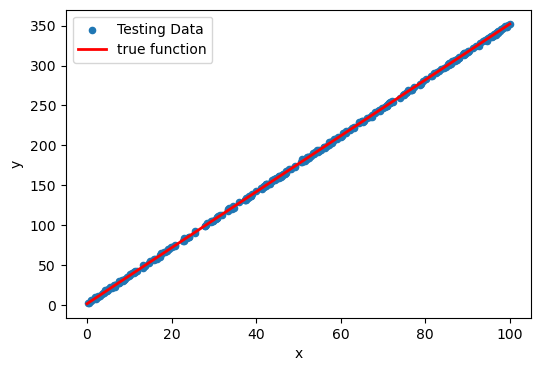

In [3]:
plt.figure(figsize=(6,4))
plt.scatter(Xtest, ytest,s=20,label='Testing Data')
x_=np.linspace(0, 100, 100)
y_=3.5*x_+2
plt.plot(x_,y_,c='red',lw=2,label='true function')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Linear Regression with Closed-form Solution
$$w^{*}=(X^TX)^{-1}X^TY$$

In [4]:
lr=L1.LinearRegression()
lr.fit(Xtrain,ytrain)
lr.rmse(Xtest,ytest)

0.9814487826808305

In [5]:
print('The predicted form of function is: y =',str(lr.w[0][0]),'x1 +',str(lr.w[1][0]))

The predicted form of function is: y = 3.500962184394507 x1 + 1.8950722129252036


## Linear Regression with Gradient Descent
$$w_{t+1}=w_t - \alpha * \frac{\partial RSS(w)}{\partial w},$$ where $\alpha$ is the learning rate of gradient descent
$$RSS(w)=\|Xw-y\|^{2}_{2}$$
$$\frac{\partial RSS(w)}{\partial w}=X^T(Xw-y)$$

In [6]:
lr_gd=L2.LinearRegression()
lr_gd.fit(Xtrain,ytrain,alpha=0.0001, max_iter=1000)
lr_gd.rmse(Xtest,ytest)

1.1750713504059664

In [7]:
print('The predicted form of function is: y =',str(lr_gd.w[0][0]),'x1 +',str(lr_gd.w[1][0]))

The predicted form of function is: y = 3.51756224972278 x1 + 0.8207762562643423


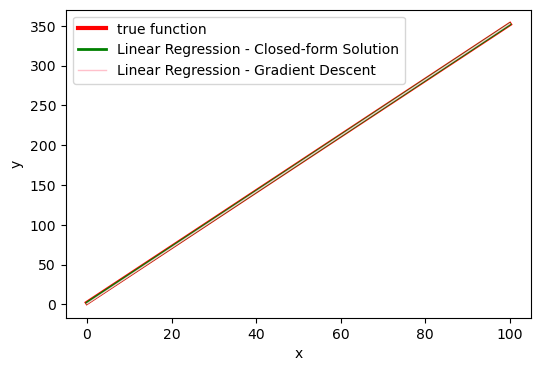

In [8]:
plt.figure(figsize=(6,4))
#plt.scatter(Xtest, ytest,s=20,label='Testing Data')
x_=np.linspace(0, 100, 100)
y_=3.5*x_+2
y_1=lr.w[0][0]*x_+lr.w[1][0]
y_2=lr_gd.w[0][0]*x_+lr_gd.w[1][0]
plt.plot(x_,y_,c='red',lw=3,label='true function')
plt.plot(x_,y_1,c='green',lw=2,label='Linear Regression - Closed-form Solution')
plt.plot(x_,y_2,c='pink',lw=1,label='Linear Regression - Gradient Descent')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Polynomial Model
The true function $$y_i = f(x_i)+ \epsilon_i$$ is defined as $$y_i=3.5 x_i +3x_i^2+ 2.2x_i^3 +2 + \epsilon_i,$$ where $y=[y_1,y_2,...,y_n]$ is the output value, $X=[X_1,X_2<...,X_n]$ is the input matrix, and $\epsilon_i$ is the random noise drawn from normal distribution(0,1)

In [9]:
X=np.random.uniform(0,100,1000)
y=(3.5*X+3*X**2+2.2*X**3+2+np.random.normal(size=(len(X)))).reshape(len(X),1)

ind=np.random.rand(X.shape[0])<0.7
Xtrain=X[ind]
ytrain=y[ind]
Xtest=X[~ind]
ytest=y[~ind]

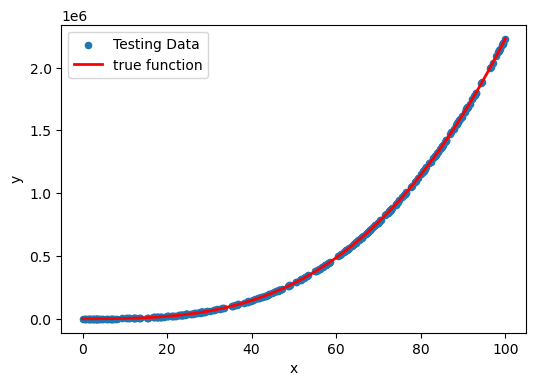

In [10]:
plt.figure(figsize=(6,4))
plt.scatter(Xtest, ytest,s=20,label='Testing Data')
x_=np.linspace(0, 100, 100)
y_=3.5*x_+3*x_**2+2.2*x_**3+2
plt.plot(x_,y_,c='red',lw=2,label='true function')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Polynomial Regression
|
$$\phi=[\phi(x_1), \phi(x_2),...,\phi(x_n)]^T$$
$$\phi(x_i)=[x_i,x_i^2,...,x_i^k]$$

In [11]:
Xval, Xtra=Xtrain[500:], Xtrain[:500]
yval, ytra=ytrain[500:], ytrain[:500]

In [12]:
Ks=list(range(1,11))
rmses_train=[]
rmses_val=[]
for k in range(1,11):
    pr=PR.PolynomialRegression()
    pr.fit(Xtra,ytra,k)
    rmses_train.append(pr.rmse(Xtra, ytra))
    rmses_val.append(pr.rmse(Xval, yval))
    

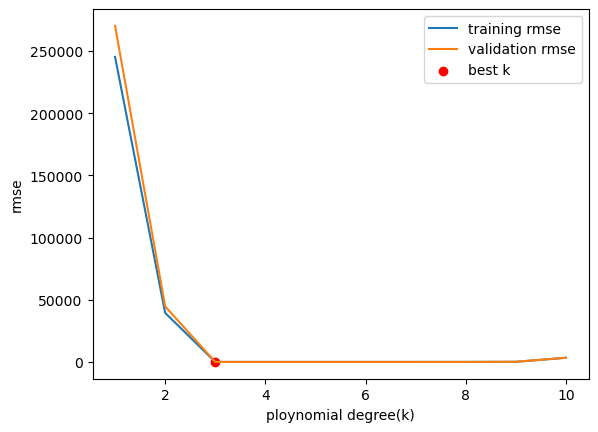

In [13]:
plt.plot(Ks, rmses_train, label='training rmse')
plt.plot(Ks, rmses_val, label='validation rmse')
plt.scatter(3,rmses_val[2],c='red', label='best k')
plt.legend()
plt.xlabel('ploynomial degree(k)')
plt.ylabel('rmse')
plt.show()

In [14]:
pr=PR.PolynomialRegression()
pr.fit(Xtra,ytra,3)
pr.rmse(Xtrain, ytrain)

1.0226171985993182

In [15]:
print('The predicted form of function is: y =',str(pr.w[1][0]),'x +',
      str(pr.w[2][0]),'x^2 +',str(pr.w[3][0]),'x^3 +',str(pr.w[0][0]))

The predicted form of function is: y = 3.5128377497762813 x + 2.999788656997751 x^2 + 2.2000009514453964 x^3 + 1.8352267999234755


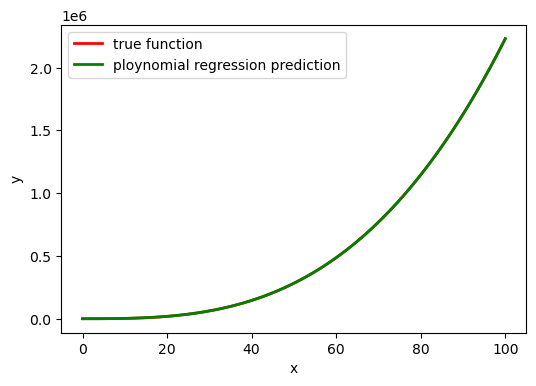

In [16]:
plt.figure(figsize=(6,4))
x_=np.linspace(0, 100, 100)
y_=3.5*x_+3*x_**2+2.2*x_**3+2
y_1=pr.w[1][0]*x_+pr.w[2][0]*x_**2+pr.w[3][0]*x_**3+pr.w[0][0]
plt.plot(x_,y_,c='red',lw=2,label='true function')
plt.plot(x_,y_1,c='green',lw=2,label='ploynomial regression prediction')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Glucose Concentration Dataset - Ridge and Lasso Regression
In order to demonstrate the ridge and lasso regression estimation, we use a data example prepared by Liebmann et al. (2009) (https://www.ncbi.nlm.nih.gov/pubmed/19427473). The matrix Y contains the concentration of glucose and ethanol (in g/L) for n = 166 alcoholic fermentation mashes of different feedstocks (rye, wheat and corn). These are the two dependent variables. There are 235 covariates in X, which contain the first derivatives of near infrared spectroscopy (NIR) absorbance values at 1115 − 2285 nm. In this problem, we will predict the glucose concentration for the given covariates. The training dataset (files: Ytraining.csv, Xtraining.csv) consists of 126 observations. The dataset is further divided into a validation set (files: Yvalida- tion.csv, Xvalidation.csv) and a testing set (files: Ytesting.csv, Xtesting.csv); each contains 20 observations.

In [17]:
Xtrain=np.genfromtxt('data/Xtraining.csv', delimiter=',')
ytrain=np.genfromtxt('data/ytraining.csv', delimiter=',')
Xval = np.genfromtxt("data/Xvalidation.csv", delimiter=',')
yval = np.genfromtxt("data/yvalidation.csv", delimiter=',')
Xtest=np.genfromtxt("data/Xtesting.csv", delimiter=',')
ytest = np.genfromtxt("data/Ytesting.csv", delimiter=',')

## Lasso Regression with Gradient Descent
$$RSS(w,b)=\|Xw+b-y\|^{2}_{2} + \alpha\|w\|,$$ where $b$ is the bias term
$$w_{t+1}=w_t - \eta * \frac{\partial RSS(w,b)}{\partial w}$$
$$b_{t+1}=b_t - \eta * \frac{\partial RSS(w,b)}{\partial b},$$where $\eta$ is the learning rate of gradient descent
$$\frac{\partial RSS(w,b)}{\partial w} = X^T(Xw+b-y)+\alpha*sign(w)$$
$$\frac{\partial RSS(w,b)}{\partial b} = \|Xw+b-y\|$$

In [18]:
lambdas=[]
for a in range(1,10):
    for b in range(-5,1):
        lambdas.append(a*(10**b))
lambdas=np.array(lambdas)

rmses=[]
for l in lambdas:
    r=LR.LassoRegression()
    r.fit(Xtrain, ytrain.reshape((len(ytrain),1)), alpha=l, eta=0.0001, max_iter=5000)
    rmse = r.rmse(Xval, yval.reshape((len(yval),1)))
    rmses.append(rmse)
best_l=lambdas[np.argmin(rmses)]

early stop at iter:3707 , cost= 27840.863559154222
early stop at iter:3586 , cost= 27896.48288009362
early stop at iter:1693 , cost= 27871.70645368559


In [19]:
print("the optimal lambda is:",best_l)
print("the optimal rmse is: ", min(rmses))

the optimal lambda is: 0.0007
the optimal rmse is:  12.913068136139342


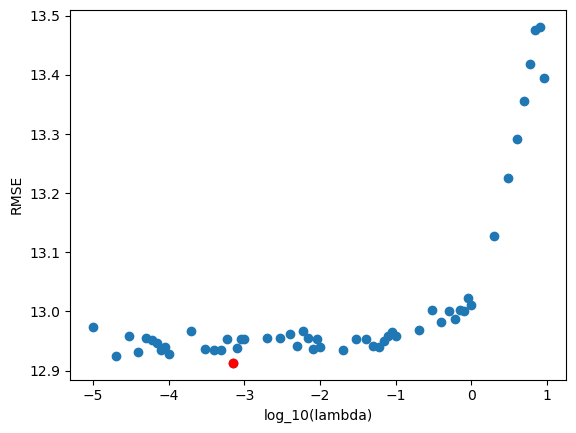

In [20]:
plt.scatter(np.log10(lambdas), rmses, marker='o')
plt.scatter(np.log10(best_l), np.min(rmses), c='red')

plt.xlabel('log_10(lambda)')
plt.ylabel('RMSE')
plt.show()

## Ridge Regression
$$RSS(w)=\|Xw-y\|^{2}_{2} + \alpha\|w\|^{2}_{2}$$
$$w^*=X^T(Xw-y)+2\alpha$$

In [21]:
lambdas=[]
for a in range(1,10):
    for b in range(-5,1):
        lambdas.append(a*(10**b))
lambdas=np.array(lambdas)

rmses=[]
for l in lambdas:
    r=RR.RidgeRegression()
    r.fit(Xtrain, ytrain.reshape((len(ytrain),1)), alpha=l)
    rmse = r.rmse(Xval, yval.reshape((len(yval),1)))
    rmses.append(rmse)
best_l=lambdas[np.argmin(rmses)]

In [22]:
print("the optimal lambda is:",best_l)
print("the optimal rmse is: ", min(rmses))

the optimal lambda is: 0.002
the optimal rmse is:  2.5895071472818545


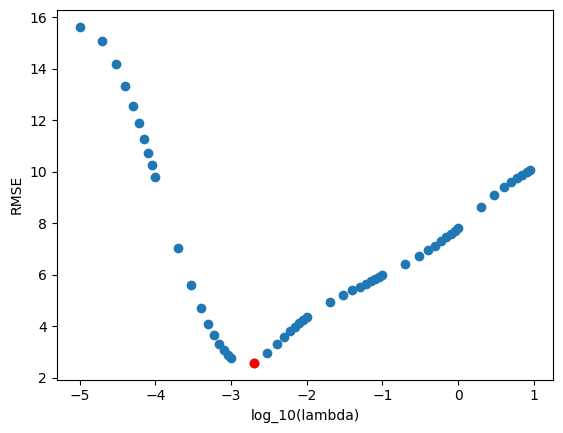

In [23]:
plt.scatter(np.log10(lambdas), rmses, marker='o')
plt.scatter(np.log10(best_l), np.min(rmses), c='red')

plt.xlabel('log_10(lambda)')
plt.ylabel('RMSE')
plt.show()